In [4]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('/content/data.csv')
#print(data.head())

In [6]:
missing_values = data.isnull().sum()
#print("Missing Values:\n", missing_values)

imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
#print("Missing Values After Imputation:\n", data_imputed.isnull().sum())

scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_imputed), columns=data_imputed.columns)
#print("Data after scaling:\n", data_scaled.head())

data_scaled['total_microaneurysms'] = data_scaled[['ma1', 'ma2', 'ma3', 'ma4', 'ma5', 'ma6']].sum(axis=1)
data_scaled['total_exudates'] = data_scaled[['exudate1', 'exudate2', 'exudate3', 'exudate4', 'exudate5', 'exudate6', 'exudate7', 'exudate8']].sum(axis=1)

data_engineered = data_scaled.drop(['ma1', 'ma2', 'ma3', 'ma4', 'ma5', 'ma6', 'exudate1', 'exudate2', 'exudate3', 'exudate4', 'exudate5', 'exudate6', 'exudate7', 'exudate8'], axis=1)
#print("Data after feature engineering:\n", data_engineered.head())

In [7]:
X = data.drop(columns=['Class'])
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
def create_ann_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
model = create_ann_model()

In [10]:
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test), verbose=0)

y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [11]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_probs)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC-ROC: {auc_roc:.4f}')

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7446
Precision: 0.8053
Recall: 0.7109
F1 Score: 0.7552
AUC-ROC: 0.8321

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.79      0.73       103
           1       0.81      0.71      0.76       128

    accuracy                           0.74       231
   macro avg       0.75      0.75      0.74       231
weighted avg       0.75      0.74      0.75       231



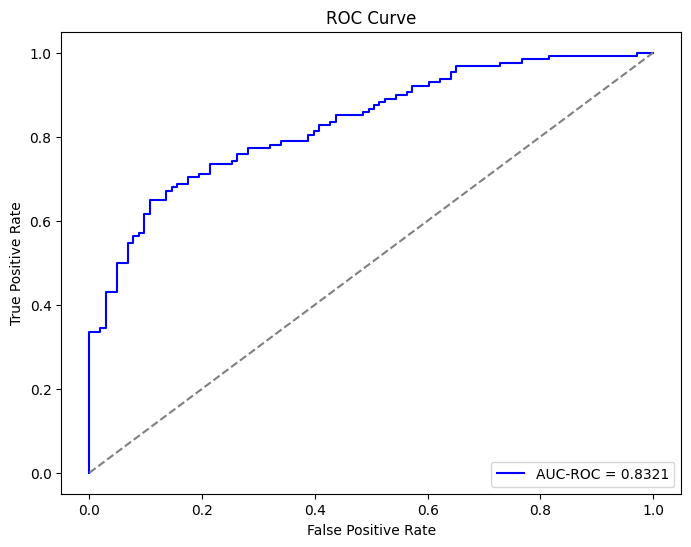

In [12]:
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC-ROC = {auc_roc:.4f}')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

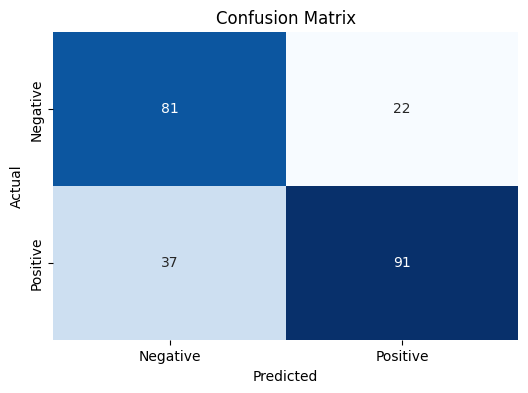

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()